# 音檔解析

## 載入相關套件

In [1]:
# 載入相關套件
import IPython

## 播放音檔(wav)

In [2]:
# 檔案來源：https://github.com/maxifjaved/sample-files
wav_file = './audio/WAV_1MG.wav'

# autoplay=True：自動播放，不須按 PLAY 鍵
IPython.display.Audio(wav_file, autoplay=False) 

## 取得音檔的屬性

In [6]:
# 取得音檔的屬性
import wave

f=wave.open(wav_file)
print(f'取樣頻率={f.getframerate()}, 幀數={f.getnframes()}, ' +
      f'聲道={f.getnchannels()}, 精度={f.getsampwidth()}, ' +
      f'檔案秒數={f.getnframes() / f.getframerate():.2f}')
f.close()

取樣頻率=16000, 幀數=16000, 聲道=1, 精度=2, 檔案秒數=1.00


## 使用 PyAudio 函數庫串流播放

In [3]:
# 使用 PyAudio 串流播放
import pyaudio  

def PlayAudio(filename, seconds=-1):
    # 定義串流區塊大小(stream chunk)
    chunk = 1024  

    # 開啟音檔
    f = wave.open(filename,"rb")  
    
    # 初始化 PyAudio  
    p = pyaudio.PyAudio()  
    
    # 開啟串流  
    stream = p.open(format = p.get_format_from_width(f.getsampwidth()),  
                    channels = f.getnchannels(), rate = f.getframerate(), output = True) 
                                             
    # 計算每秒區塊數
    sample_count_per_second = f.getframerate() / chunk
    
    # 計算總區塊數
    if seconds > 0 :
        total_chunk = seconds * sample_count_per_second
    else:
        total_chunk = (f.getnframes() / (f.getframerate() * f.getnchannels())) \
                        * sample_count_per_second
        
    print(f'每秒區塊數={sample_count_per_second}, 總區塊數={total_chunk}')    
    
    # 每次讀一區塊 
    data = f.readframes(chunk)  
    no=0
    while data:  
        # 播放區塊
        stream.write(data)  
        data = f.readframes(chunk)  
        no+=1
        if seconds > 0 and no > total_chunk :
            break

    # 關閉串流  
    stream.stop_stream()  
    stream.close()  

    # 關閉 PyAudio  
    p.terminate()  

In [4]:
# 播放音檔
PlayAudio(wav_file, -1)

NameError: name 'wave' is not defined

In [11]:
# 播放音檔 3 秒
PlayAudio(wav_file, 3)

每秒區塊數=7.8125, 總區塊數=23.4375


## 繪製波形

In [5]:
# 繪製波形
import numpy as np
import wave
import sys
import matplotlib.pyplot as plt

# 單聲道繪製波形
def DrawWavFile_mono(filename):
    # 開啟音檔
    f = wave.open(filename, "r")

    # 字串轉換整數
    signal = f.readframes(-1)
    signal = np.frombuffer(signal, np.int16)
    fs = f.getframerate()

    # 非單聲道無法解析
    if f.getnchannels() == 1:
        Time = np.linspace(0, len(signal) / fs, num=len(signal))

        # 繪圖
        plt.figure(figsize=(12,6))
        plt.title("Signal Wave...")
        plt.plot(Time, signal)
        plt.show()
    else:
        print('非單聲道無法解析')       

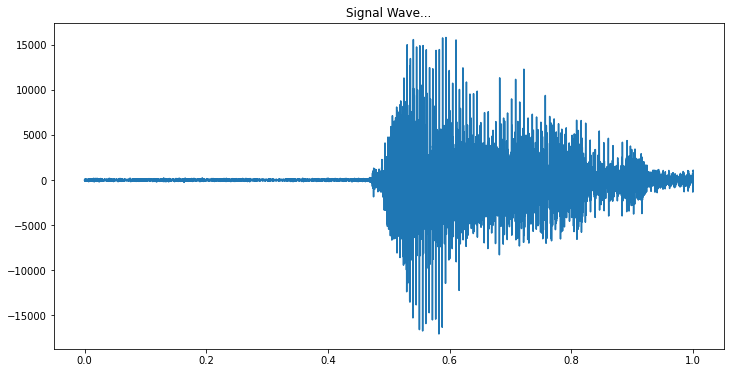

In [6]:
wav_file = './audio/down.wav'
DrawWavFile_mono(wav_file)

In [7]:
# 取得音檔的屬性
f=wave.open(wav_file)
print(f'取樣頻率={f.getframerate()}, 幀數={f.getnframes()}, ' +
      f'聲道={f.getnchannels()}, 精度={f.getsampwidth()}, ' +
      f'檔案秒數={f.getnframes() / f.getframerate():.2f}')
f.close()

取樣頻率=16000, 幀數=16000, 聲道=1, 精度=2, 檔案秒數=1.00


In [8]:
# 多聲道繪製波形
def DrawWavFile_stereo(filename):
    # 開啟音檔
    with wave.open(filename,'r') as wav_file:
        # 字串轉換整數
        signal = wav_file.readframes(-1)
        signal = np.frombuffer(signal, np.int16)

        # 為每一聲道準備一個 list 
        channels = [[] for channel in range(wav_file.getnchannels())]
        
        # 將資料放入每個 list 
        for index, datum in enumerate(signal):
            channels[index % len(channels)].append(datum)

        # 計算時間
        fs = wav_file.getframerate()
        Time=np.linspace(0, len(signal)/len(channels)/fs, 
                         num=int(len(signal)/len(channels)))

        f, ax = plt.subplots(nrows=len(channels), ncols=1,figsize=(10,6))
        for i, channel in enumerate(channels):
            if len(channels)==1:
                ax.plot(Time,channel)
            else:
                ax[i].plot(Time,channel)

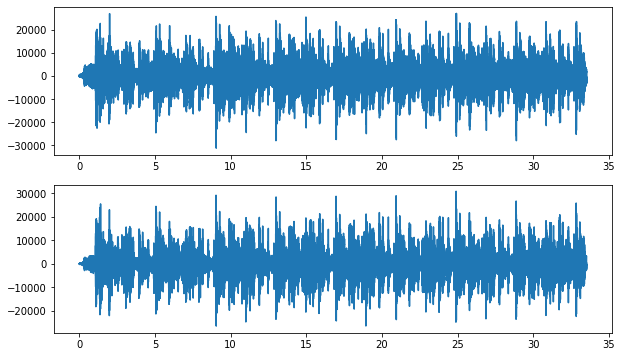

In [9]:
wav_file = './audio/WAV_1MG.wav'
DrawWavFile_stereo(wav_file)

In [10]:
# 多聲道繪製波形
def DrawWavFile(wav_file):
    f=wave.open(wav_file)
    channels = f.getnchannels() # 聲道
    f.close()

    if channels == 1:
        DrawWavFile_mono(wav_file)
    else:
        DrawWavFile_stereo(wav_file)    

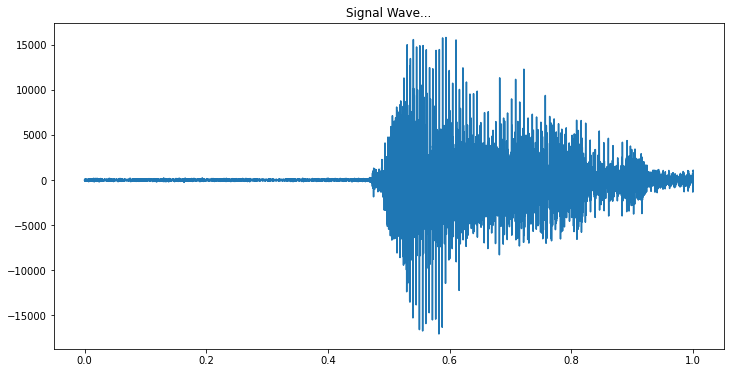

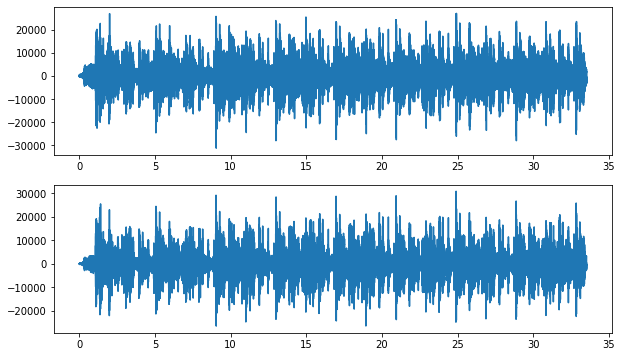

In [11]:
wav_file = './audio/down.wav'
DrawWavFile(wav_file)
wav_file = './audio/WAV_1MG.wav'
DrawWavFile(wav_file)

## 產生音檔

In [12]:
# 產生音檔
import wave, struct, random

sampleRate = 44100.0 # 取樣頻率
duration = 1.0 # 秒數

wav_file = './audio/random.wav'
obj = wave.open(wav_file,'w')
obj.setnchannels(1) # 單聲道
obj.setsampwidth(2)
obj.setframerate(sampleRate)
for i in range(99999):
    value = random.randint(-32767, 32767)
    data = struct.pack('<h', value) # <h：short, big-endian
    obj.writeframesraw(data)
obj.close()

IPython.display.Audio(wav_file) 

In [13]:
# 取得音檔的屬性
f=wave.open(wav_file)
print(f'取樣頻率={f.getframerate()}, 幀數={f.getnframes()}, ' +
      f'聲道={f.getnchannels()}, 精度={f.getsampwidth()}, ' +
      f'檔案秒數={f.getnframes() / (f.getframerate() * f.getnchannels()):.2f}')
f.close()

取樣頻率=44100, 幀數=99999, 聲道=1, 精度=2, 檔案秒數=2.27


## 雙聲道音檔轉換為單聲道

In [14]:
# 雙聲道音檔轉換為單聲道
import numpy as np

wav_file = './audio/WAV_1MG.wav'
# 開啟音檔
with wave.open(wav_file,'r') as f:
    # 字串轉換整數
    signal = f.readframes(-1)
    signal = np.frombuffer(signal, np.int16)

    # 為每一聲道準備一個 list 
    channels = [[] for channel in range(f.getnchannels())]

    # 將資料放入每個 list 
    for index, datum in enumerate(signal):
        channels[index % len(channels)].append(datum)

    sampleRate = f.getframerate() # 取樣頻率
    sampwidth = f.getsampwidth()

wav_file_out = './audio/WAV_1MG_mono.wav'
obj = wave.open(wav_file_out,'w')
obj.setnchannels(1) # 單聲道
obj.setsampwidth(sampwidth)
obj.setframerate(sampleRate)
for data in channels[0]:
    obj.writeframesraw(data)
obj.close()

In [15]:
IPython.display.Audio(wav_file_out) 

In [16]:
# 取得音檔的屬性
import wave

f=wave.open(wav_file)
print(f'取樣頻率={f.getframerate()}, 幀數={f.getnframes()}, ' +
      f'聲道={f.getnchannels()}, 精度={f.getsampwidth()}, ' +
      f'檔案秒數={f.getnframes() / f.getframerate():.2f}')
f.close()

取樣頻率=8000, 幀數=268237, 聲道=2, 精度=2, 檔案秒數=33.53
